# Hello World with Qiskit

In [3]:
# Import modules
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [4]:
# Build 2 qubit quantum register
qr = QuantumRegister(2)

In [5]:
# Build 2 classical register
cr = ClassicalRegister(2)

In [6]:
# Build circuit from quantum and classical registers
circuit = QuantumCircuit(qr, cr)

In [7]:
# Draw the quantum circuit using matplotlib
%matplotlib inline
circuit.draw()

# You will see 2 qubits and 2 classical bits (combined in c0)

q0_0: 
      
q0_1: 
      
c0: 2/

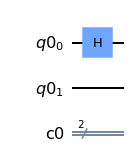

In [8]:
# Apply hadamard gate on first qubit to make entanglement
circuit.h(qr[0])
circuit.draw(output='mpl')

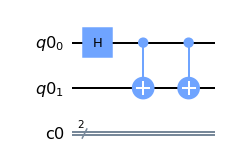

In [9]:
# Apply two qubits operation. In this case we will apply CNOT gate
# CNOT gate is like logical if. Control qubit is the first qubit
# Second qubit act as target qubit
circuit.cx(qr[0], qr[1])
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

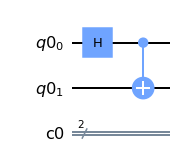

In [10]:
# Oops we add to much CNOT gate. We can delete second CNOT gate like this
# It will delete third (remember to count from 0) GATE in Quantum Circuit.
circuit.data.pop(2)
circuit.draw(output='mpl')

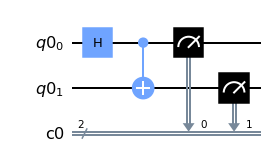

In [11]:
# Let's measure the qubits and save the measurement in classical bits
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [12]:
# Use AER Simulation to do Quantum Computer Simulation
simulator = Aer.get_backend('qasm_simulator')

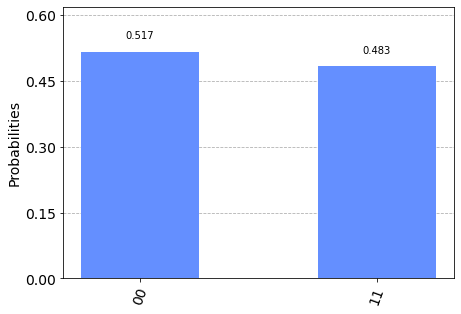

In [13]:
# Get result fo our simulation and plot the histogram
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

In [24]:
# Use real Quantum Computer from IBM
# Load our account
IBMQ.load_account()

# Choose our device
provider = IBMQ.get_provider('ibm-q')
# You can check other quantum computer available with this
# provider.backends()
qcomp = provider.get_backend('ibmq_lima')

ibmqfactory.load_account:WARNING:2022-01-13 22:30:18,608: Credentials are already in use. The existing account in the session will be replaced.


In [21]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [25]:
# Execute and monitor our job
job = execute(circuit, backend=qcomp)
job_monitor(job)
# The queue take to long! 9 hours??
# You can check your estimateion queue time in yout IBM Quantum dashboard

Job Status: job is queued (10)    

KeyboardInterrupt: 

In [ ]:
# See our result
result = job.result()
plot_histogram(result.get_counts(circuit))

# Result from Quantum Computer is different from our Simulator.
# It's becasue Simulator is simulate perfect Quantum Computer.
# While the Real Quantum Computer still have some quantum error due to it's still emerging technology.